In [14]:
#import module

import pandas
import pycaret
import numpy as np
import math
import matplotlib.pyplot as plt
from pycaret.regression import *
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from pycaret.regression import load_model

import plotly.io as pio
pio.renderers.default = 'iframe_connected'

import time

In [15]:
fileName = "max_depth_sweep_N100000"

np.save(fileName,data)

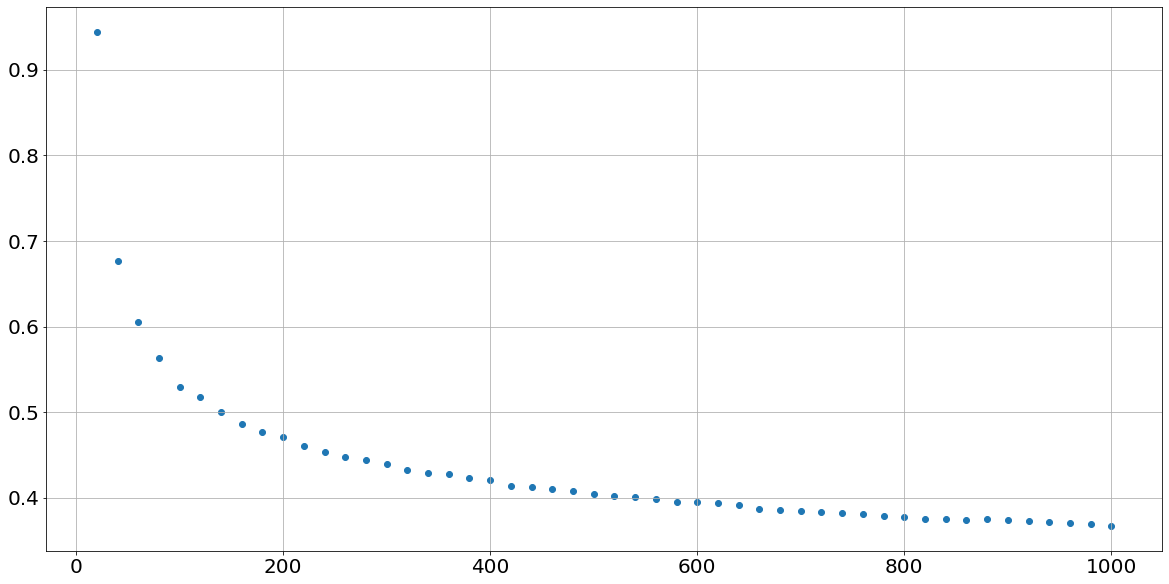

In [12]:
# plt.scatter(range(20,size1*20+20,20),R2_mean)
plt.scatter(range(20,size1*20+20,20),MAE_mean)
# plt.scatter(range(20,size1*20+20,20),MSE_mean)
# plt.scatter(range(20,size1*20+20,20),RMSE_mean)
# plt.scatter(range(20,size1*20+20,20),MAE_mean)
plt.grid(True)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.7392,1.2877,1.1348,0.9777,0.0665,0.0574
1,0.7336,1.2420,1.1144,0.9786,0.0668,0.0575
2,0.7536,1.3039,1.1419,0.9785,0.0686,0.0590
3,0.7455,1.3769,1.1734,0.9764,0.0689,0.0582
4,0.7175,1.1692,1.0813,0.9798,0.0657,0.0569
5,0.7212,1.2968,1.1388,0.9781,0.0667,0.0565
6,0.7628,1.3488,1.1614,0.9772,0.0677,0.0583
7,0.7252,1.2438,1.1152,0.9781,0.0673,0.0566
8,0.7312,1.2345,1.1111,0.9786,0.0666,0.0574
9,0.7185,1.2003,1.0956,0.9787,0.0654,0.0561


avg error :  2.7188625348625157
avg error :  2.9881053427833475


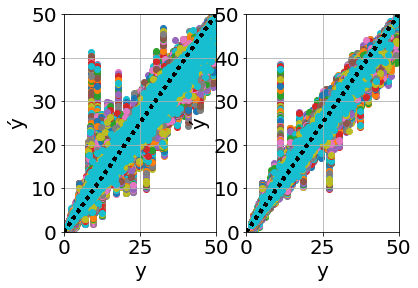

In [ ]:
fn = "./Data_2021_10_14_v1 (N98923)/Data.csv"
pm = "Llt"

size1 = 50
size2 = 20


data = np.zeros([size1,size2,5])

# 98345


for i in range(0,size1) :
    for j in range(0,size2) :

        print(f'{i},{j}')

        raw_data = load_data(filename=fn, pp=1)
        # raw_data = raw_data.sample(n=500).reset_index(drop=True)

        # featured_data = add_feature(data=raw_data, parameter=pm, lower_limit=0, upper_limit=50, new_feature_names = ["N1s"])
        featured_data = add_nofeature(data=raw_data, parameter=pm, lower_limit=0, upper_limit=50)
        featured_data = featured_data.apply(pd.to_numeric) # object to numeric

        # [lgbm, data_train, data_test] = regression_data(pre_data=featured_data, parameter=pm, new_feature_names = ["N1s"])
        [lgbm, data_train, data_test] = regression_data(pre_data=featured_data, parameter=pm, new_feature_names = [], nl=20*(i+1), md=math.floor(math.sqrt(20*(i+1))))
        [R2,MAE,MSE,RMSE,MPE] = verify_data(model=lgbm, data=data_train, data_unseen=data_test, parameter=pm, legend=0, xlim=[0,50], ylim=[0,50])

        data[i,j,:] = np.array([R2,MAE,MSE,RMSE,MPE]).reshape((1, 1, -1)) 


R2_mean = np.mean(data[:,:,0], axis=1)
R2_std = np.std(data[:,:,0], axis=1)
R2_min = np.min(data[:,:,0], axis=1)
R2_max = np.max(data[:,:,0], axis=1)

MAE_mean = np.mean(data[:,:,1], axis=1)
MAE_std = np.std(data[:,:,1], axis=1)
MAE_min = np.min(data[:,:,1], axis=1)
MAE_max = np.max(data[:,:,1], axis=1)

MSE_mean = np.mean(data[:,:,2], axis=1)
MSE_std = np.std(data[:,:,2], axis=1)
MSE_min = np.min(data[:,:,2], axis=1)
MSE_max = np.max(data[:,:,2], axis=1)

RMSE_mean = np.mean(data[:,:,3], axis=1)
RMSE_std = np.std(data[:,:,3], axis=1)
RMSE_min = np.min(data[:,:,3], axis=1)
RMSE_max = np.max(data[:,:,3], axis=1)

MPE_mean = np.mean(data[:,:,4], axis=1)
MPE_std = np.std(data[:,:,4], axis=1)
MPE_min = np.min(data[:,:,4], axis=1)
MPE_max = np.max(data[:,:,4], axis=1)

# print(f'R2(mean,std,min,max) : {R2_mean}/{R2_std}/{R2_min}/{R2_max}')
# print(f'MAE(mean,std,min,max) : {MAE_mean}/{MAE_std}/{MAE_min}/{MAE_max}')
# print(f'MSE(mean,std,min,max) : {MSE_mean}/{MSE_std}/{MSE_min}/{MSE_max}')
# print(f'RMSE(mean,std,min,max) : {RMSE_mean}/{RMSE_std}/{RMSE_min}/{RMSE_max}')
# print(f'MPE(mean,std,min,max) : {MPE_mean}/{MPE_std}/{MPE_min}/{MPE_max}')


    




In [3]:
def load_data(filename,pp):

    csv = pandas.read_csv(filename)
    csv = csv.dropna(axis=0).reset_index(drop=True) #drop NaN

    if pp == 1 : # post process (elemenate outlier data)

        csv = csv[csv['Lmt']>0.1].reset_index(drop=True)
        csv = csv[csv['Lmr']>0.1].reset_index(drop=True)
        csv['k'] = -csv['k']
        csv = csv[csv['k']>0].reset_index(drop=True)

    #calculate R
    array_len = len(csv)
    R1 = np.zeros(array_len)
    R2 = np.zeros(array_len)
    R1 = csv["copperloss_tx"]/100**2
    R2 = csv["copperloss_rx"]/100**2

    csv = csv.assign(R1 = R1)
    csv = csv.assign(R2 = R2)

    return csv 

In [4]:
def add_feature(data, parameter, lower_limit, upper_limit, new_feature_names = []):

    #output data pre processing
    if lower_limit != -1 :
        data = data[data[parameter] > lower_limit].reset_index(drop=True)
    if upper_limit != -1 :
        data = data[data[parameter] < upper_limit].reset_index(drop=True)

    #return csv.describe().iloc[2,:].tolist()


    # unpack
    #N1,N2,d1,d2,freq,move_tx,move_rx,offset_tx,offset_rx,per,space1,space2,space3,space4,l1,l2,h1,w1,Lmt,Lmr,Llt,Llr,k,Lt,Lr,Lm,Rt,Rr,I1,I2,Zt,Zr,Zm,copperloss_tx,copperloss_rx,R1,R2 = np.hsplit(csv.to_numpy(),37)
    N1,N2,d1,d2,freq,move_tx,move_rx,offset_tx,offset_rx,per,space1,space2,space3,space4,l1,l2,h1,w1, \
    Lmt,Lmr,Llt,Llr,k,Lt,Lr,Lm,Rt,Rr,I1,I2,Zt,Zr,Zm,copperloss_tx,copperloss_rx,R1,R2 = np.hsplit(data.to_numpy(),37)
    input_arrs = [N1,N2,d1,d2,freq,move_tx,move_rx,offset_tx,offset_rx,per,space1,space2,space3,space4,l1, l2, h1, w1] # 20


    col_names = ["N1", "N2", "d1" , "d2", "freq", "move_tx", "move_rx", "offset_tx", "offset_rx", "per", "space1", "space2", "space3", "space4", "l1", "l2", "h1", "w1"]
    input_arrs = pandas.DataFrame(np.array(input_arrs).squeeze().transpose(), columns = col_names)



    #Generae Features

    Nones = N1*2
    N1s = N1**2
    N2s = N2**2
    offset = abs(offset_tx-offset_rx)
    length1 = N1 * (l1*2 + space1*2 + w1 + space3*2)/2 + N1 * (l1*2 + space1*2 + w1 + space3*2)/2
    length4 = N2 * (l1*2 + space2*2 + w1 + space4*2)/2 + N2 * (l2*2 + space2*2 + w1 + space4*2)/2
    window1 = (l1 * 2 + space1 *2) * (w1 + space3 *2)
    window2 = (l1 * 2 + space2 *2) * (w1 + space4 *2)
    window_ratio = window2/window1
    from_l2 = (l2) - (space2)
    hw1 = N1*d1 + (N1-1)*move_tx
    hw2 = N2*d2 + (N2-1)*move_rx
    hw_diff = abs(hw1-hw2)+offset
    space12 = space2-d2/2-space1
    space34 = space4-d2/2-space3
    volume = (4*l1+2*l2)*(h1+2*l1)*w1 - 2*(l2*w1*h1)
    WL_iso1 = per*(l2+2*l1)*(N1**2*space12/hw1)
    WL_iso2 = per*(l2+2*l1)*(N1**2*space34/hw1)
    skin_depth = (1/3.14/freq/per)**0.5
    copper_skin_depth = (1.678*1e-2/3.14/0.999991/4/3.14/1e-7/freq)**0.5*1e-3
    skin_depth_ratio = d1*1e-3/copper_skin_depth
    d1s = d1**2
    d2s = d2**2
    ratio1 = (d1/2)**2 - ((d1/2)-skin_depth)**2 / (d1/2)**2
    ratio2 = (d2/2)**2 - ((d2/2)-skin_depth)**2 / (d2/2)**2


    per0 = 1 * 4 * 3.14 * 1e-7
    deq1 = (3.14/4)**0.5*d1*1e-3
    deq2 = (3.14/4)**0.5*d2*1e-3

    con = 1/1.678e-8
    eff1 = N1*deq1/h1
    eff2 = N2*deq2/h1

    sd = (1/3.14/per0/con/freq)**0.5
    sd1 = sd/eff1**0.5
    sd2 = sd/eff2**0.5

    delta1 = deq1 / sd1
    delta2 = deq2 / sd2

    m = 2

    sinh = np.vectorize(math.sinh)
    sin = np.vectorize(math.sin)
    cosh = np.vectorize(math.cosh)
    cos = np.vectorize(math.cos)

    G11 = (sinh(delta1)+cos(delta1))/(cosh(delta1)-cos(delta1))
    G12 = (sinh(delta1)-cos(delta1))/(cosh(delta1)+cos(delta1))
    Fr1 = delta1/2 * (G11 + (m**2-1)/3*G12)

    G21= (sinh(delta2)+cos(delta2))/(cosh(delta2)-cos(delta2))
    G22 = (sinh(delta2)-cos(delta2))/(cosh(delta2)+cos(delta2))
    Fr2 = delta2/2 * (G21 + (m**2-1)/3*G22)
    
    
    

    new_features_dict = {
        "Nones" : Nones,
        "N1s"       : N1s,
        "N2s"       : N2s,
        "offset"    : offset,
        "length1"   : length1,
        "length4"   : length4,
        "window1" : window1,
        "window2"  : window2,
        "window_ratio" : window_ratio,
        "from_l2"   : from_l2,
        "hw1" : hw1,
        "hw2" : hw2,
        "hw_diff" : hw_diff,
        "space12" : space12,
        "space34" : space34,
        "volume" : volume,
        "WL_iso1" : WL_iso1,
        "WL_iso2" : WL_iso2,
        "skin_depth" : skin_depth,
        "copper_skin_depth" : copper_skin_depth,
        "skin_depth_ratio" : skin_depth_ratio,
        "d1s" : d1s,
        "d2s" : d2s,
        "eff1" : eff1,
        "eff2" : eff2,
        "G11" : G11,
        "G12" : G12,
        "G21" : G21,
        "G22" : G22,
        "Fr1" : Fr1,
        "Fr2" : Fr2,
        "sd1" : sd1,
        "sd2" : sd2,
        "ratio1" : ratio1,
        "ratio2" : ratio2,
        "delta1" : delta1,
        "delta2" : delta2,
        "Fr1" : delta1/2 * (G11+G12),
        "Fr2" : delta2/2 * (G21+G22)
    }
    #filter by 'new_features'
    new_features_arrs = [v for (k,v) in new_features_dict.items() if k in new_feature_names]
    new_features_arrs = pandas.DataFrame(np.array(new_features_arrs).squeeze().transpose(), columns = new_feature_names)


    output_arrs = data[parameter]


    processed_data = pandas.concat([input_arrs, new_features_arrs, output_arrs],axis=1)

    return processed_data
        

In [5]:
def add_nofeature(data, parameter, lower_limit, upper_limit):

    #output data pre processing
    if lower_limit != -1 :
        data = data[data[parameter] > lower_limit].reset_index(drop=True)
    if upper_limit != -1 :
        data = data[data[parameter] < upper_limit].reset_index(drop=True)

    #return csv.describe().iloc[2,:].tolist()


    # unpack
    #N1,N2,d1,d2,freq,move_tx,move_rx,offset_tx,offset_rx,per,space1,space2,space3,space4,l1,l2,h1,w1,Lmt,Lmr,Llt,Llr,k,Lt,Lr,Lm,Rt,Rr,I1,I2,Zt,Zr,Zm,copperloss_tx,copperloss_rx,R1,R2 = np.hsplit(csv.to_numpy(),37)
    N1,N2,d1,d2,freq,move_tx,move_rx,offset_tx,offset_rx,per,space1,space2,space3,space4,l1,l2,h1,w1, \
    Lmt,Lmr,Llt,Llr,k,Lt,Lr,Lm,Rt,Rr,I1,I2,Zt,Zr,Zm,copperloss_tx,copperloss_rx,R1,R2 = np.hsplit(data.to_numpy(),37)
    input_arrs = [N1,N2,d1,d2,freq,move_tx,move_rx,offset_tx,offset_rx,per,space1,space2,space3,space4,l1, l2, h1, w1] # 20


    col_names = ["N1", "N2", "d1" , "d2", "freq", "move_tx", "move_rx", "offset_tx", "offset_rx", "per", "space1", "space2", "space3", "space4", "l1", "l2", "h1", "w1"]
    input_arrs = pandas.DataFrame(np.array(input_arrs).squeeze().transpose(), columns = col_names)


    output_arrs = data[parameter]


    processed_data = pandas.concat([input_arrs, output_arrs],axis=1)

    return processed_data
        

In [6]:
def regression_data(pre_data, parameter, new_feature_names, nl, md) :


    dataset = pre_data


    # split data for ML
    # data_seen = dataset.sample(frac=0.9, random_state=786).reset_index(drop=True)
    data_seen = dataset.sample(frac=0.9).reset_index(drop=True)
    data_unseen = dataset.drop(data_seen.index).reset_index(drop=True)

    features = ["N1", "N2", "d1" , "d2", "freq", "move_tx", "move_rx", "offset_tx", "offset_rx", "per", "space1", "space2", "space3", "space4", "l1", "l2", "h1", "w1"] + new_feature_names


    # regresion setting
    # exp_reg101 = setup(data = data_seen, target = parameter, session_id=123, silent=True, use_gpu=False, remove_perfect_collinearity=False) 
    exp_reg101 = setup(data = data_seen, target = parameter, silent=True, use_gpu=False, \
    numeric_features = features, \
    categorical_features = [], remove_perfect_collinearity=False) 

        

    print(exp_reg101)


    # create model
    #lgbm = create_model('lightgbm',num_leaves=60, max_depth=20)
    # lgbm = create_model('lightgbm',num_leaves=180, max_depth=14)

    # lgbm = create_model('lightgbm')
    lgbm = create_model('lightgbm',num_leaves=nl, max_depth=md)


    # data_seen = pandas.to_numeric(data_seen)
    # data_unseen = pandas.to_numeric(data_unseen)


    return [lgbm, data_seen, data_unseen]
    

In [7]:
def verify_data(model,data,data_unseen,parameter,legend,xlim=[],ylim=[]) :
    
    data_input = data.drop(parameter,axis=1)
    #print(data_input)

    #return data_input
    data_result = model.predict(data_input)
    data_unseen_input = data_unseen.drop(parameter,axis=1)
    data_unseen_result = model.predict(data_unseen_input)

    fts = 20

    plt.rc('xtick', labelsize=fts)
    plt.rc('ytick', labelsize=fts)

    plt.rc('font', size=40)

    plt.subplot(121)
    plt.scatter(data[parameter], data_result)
    plt.xlabel("y", fontsize=fts)
    plt.ylabel("ý", fontsize=fts)
    plt.grid(True)
    R2_data = r2_score(data[parameter],data_result)
    MAE_data = mean_absolute_error(data[parameter],data_result)
    MSE_data = mean_squared_error(data[parameter],data_result)
    RMSE_data = mean_squared_error(data[parameter],data_result, squared=False)

    number1 = len(data)
    number2 = len(data_unseen)
    error_sum1 = sum(abs((data[parameter]-data_result)/data[parameter]))
    error_sum2 = sum(abs((data_unseen[parameter]-data_unseen_result)/data_unseen[parameter]))

    error_avg1 = error_sum1/number1
    error_avg2 = error_sum2/number2

    if legend == 1 :
        plt.legend(["R² : " + str(round(R2_data,5)) + "\nMAE : " + str(round(MAE_data,5)) + "\nMSE : " 
        + str(round(MSE_data,5)) + "\nRMSE : " + str(round(RMSE_data,5))+ "\nMPE : " + str(round(error_avg1*100,2))+"%"],fontsize=20)
    #plt.rcParams["figure.figsize"] = (10,5)
    plt.rcParams["figure.figsize"] = (21,10)
    plt.plot([xlim[0], xlim[1]], [ylim[0], ylim[1]], linestyle=':', linewidth=3, color='black')
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])

    plt.subplot(122)
    plt.scatter(data_unseen[parameter], data_unseen_result)
    plt.xlabel("y", fontsize=fts)
    plt.ylabel("ý", fontsize=fts)
    plt.grid(True)
    R2_data_unseen = r2_score(data_unseen[parameter],data_unseen_result)
    MAE_data_unseen = mean_absolute_error(data_unseen[parameter],data_unseen_result)
    MSE_data_unseen = mean_squared_error(data_unseen[parameter],data_unseen_result)
    RMSE_data_unseen = mean_squared_error(data_unseen[parameter],data_unseen_result, squared=False)

    
    if legend == 1 :
        plt.legend(["R² : " + str(round(R2_data_unseen,5)) + "\nMAE : " + str(round(MAE_data_unseen,5)) + "\nMSE : " 
        + str(round(MSE_data_unseen,5)) + "\nRMSE : " + str(round(RMSE_data_unseen,5))+ "\nMPE : " + str(round(error_avg2*100,2))+"%"],fontsize=20)
    #plt.rcParams["figure.figsize"] = (10,5)
    plt.rcParams["figure.figsize"] = (20,10)
    plt.plot([xlim[0], xlim[1]], [ylim[0], ylim[1]], linestyle=':', linewidth=3, color='black')
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])

    plt.rc('font', size=40)

    
    print("avg error : ",error_avg1*100)
    print("avg error : ",error_avg2*100)

    
    


    return np.array([R2_data_unseen,MAE_data_unseen,MSE_data_unseen,RMSE_data_unseen,error_avg2*100])
    

In [7]:


INPUT_MEANS = [ 7.44353043e+00,  7.44353043e+00,  7.43574457e+00,  7.49133052e+00,
        3.36047079e+04,  3.99858661e+00,  4.01235447e+00,  9.48236311e+00,
       -1.04559256e+01,  3.00830743e+03,  4.99603437e+00,  4.02186080e+01,
        5.00269460e+00,  4.03668616e+01,  2.44385073e+01,  6.15593167e+01,
        1.61548355e+02,  1.31891047e+02]
        
INPUT_STDS = [2.28921143e+00, 2.28921143e+00, 2.59077066e+00, 2.59651783e+00,
       1.44819269e+04, 1.99917823e+00, 1.99440971e+00, 5.78049254e+00,
       5.76864134e+00, 1.15484277e+03, 2.57908439e+00, 1.14349466e+01,
       2.58036510e+00, 1.13331999e+01, 8.66769983e+00, 1.01767359e+01,
       5.24167607e+01, 6.76218205e+01]
"""

INPUT_MEANS = [ 7.05425308e+00,  6.92711973e+00,  6.15146277e+00,  6.18594119e+00,
        3.41608008e+04,  3.34627779e+00,  3.34229768e+00,  3.02485419e+00,
       -3.94048482e+00,  3.67327115e+03,  6.57490799e+00,  4.55254328e+01,
        6.55958836e+00,  3.63906850e+01,  2.73972509e+01,  8.74049343e+01,
        1.61378369e+02,  1.19764077e+02]
        
INPUT_STDS = [2.56152475e+00, 2.59377921e+00, 2.10891433e+00, 2.12591025e+00,
       1.44579626e+04, 1.87397430e+00, 1.87859977e+00, 1.50537840e+01,
       1.50735124e+01, 1.25274546e+03, 3.98627075e+00, 1.67105060e+01,
       3.97710246e+00, 1.05802325e+01, 1.11268357e+01, 3.11198894e+01,
       3.86219926e+01, 5.80832221e+01]

"""


def data_preprocessing(parameter, lower_limit, upper_limit, new_feature_names = []):

    #load data
    csv = pandas.read_csv(filename)
    csv = csv.dropna(axis=0).reset_index(drop=True)#drop NaN

    csv = csv[csv['Lmt']>0.1].reset_index(drop=True)
    csv = csv[csv['Lmr']>0.1].reset_index(drop=True)
    csv['k'] = -csv['k']
    csv = csv[csv['k']>0].reset_index(drop=True)

    #calculate R
    array_len = len(csv)
    R1 = np.zeros(array_len)
    R2 = np.zeros(array_len)
    R1 = csv["copperloss_tx"]/100**2
    R2 = csv["copperloss_rx"]/100**2

    csv = csv.assign(R1 = R1)
    csv = csv.assign(R2 = R2)

    csv = csv.drop("I1",axis=1)
    csv = csv.drop("I2",axis=1)
    csv = csv.drop("Zt",axis=1)
    csv = csv.drop("Zr",axis=1)
    csv = csv.drop("Zm",axis=1)

    #output data pre processing
    if lower_limit != -1 :
        csv = csv[csv[parameter] > lower_limit].reset_index(drop=True)
    if upper_limit != -1 :
        csv = csv[csv[parameter] < upper_limit].reset_index(drop=True)

    #return csv.describe().iloc[2,:].tolist()


    # unpack
    #N1,N2,d1,d2,freq,move_tx,move_rx,offset_tx,offset_rx,per,space1,space2,space3,space4,l1,l2,h1,w1,Lmt,Lmr,Llt,Llr,k,Lt,Lr,Lm,Rt,Rr,I1,I2,Zt,Zr,Zm,copperloss_tx,copperloss_rx,R1,R2 = np.hsplit(csv.to_numpy(),37)
    N1,N2,d1,d2,freq,move_tx,move_rx,offset_tx,offset_rx,per,space1,space2,space3,space4,l1,l2,h1,w1,Lmt,Lmr,Llt,Llr,k,Lt,Lr,Lm,Rt,Rr,copperloss_tx,copperloss_rx,R1,R2 = np.hsplit(csv.to_numpy(),32)
    input_arrs = [N1,N2,d1,d2,freq,move_tx,move_rx,offset_tx,offset_rx,per,space1,space2,space3,space4,l1, l2, h1, w1] # 20



    #Generae Features

    Nones = N1*2
    N1s = N1**2
    N2s = N2**2
    offset = abs(offset_tx-offset_rx)
    length1 = N1 * (l1*2 + space1*2 + w1 + space3*2)/2 + N1 * (l1*2 + space1*2 + w1 + space3*2)/2
    length4 = N2 * (l1*2 + space2*2 + w1 + space4*2)/2 + N2 * (l2*2 + space2*2 + w1 + space4*2)/2
    window1 = (l1 * 2 + space1 *2) * (w1 + space3 *2)
    window2 = (l1 * 2 + space2 *2) * (w1 + space4 *2)
    window_ratio = window2/window1
    from_l2 = (l2) - (space2)
    hw1 = N1*d1 + (N1-1)*move_tx
    hw2 = N2*d2 + (N2-1)*move_rx
    hw_diff = abs(hw1-hw2)+offset
    space12 = space2-d2/2-space1
    space34 = space4-d2/2-space3
    volume = (4*l1+2*l2)*(h1+2*l1)*w1 - 2*(l2*w1*h1)
    WL_iso1 = per*(l2+2*l1)*(N1**2*space12/hw1)
    WL_iso2 = per*(l2+2*l1)*(N1**2*space34/hw1)
    skin_depth = (1/3.14/freq/per)**0.5
    copper_skin_depth = (1.678*1e-2/3.14/0.999991/4/3.14/1e-7/freq)**0.5*1e-3
    skin_depth_ratio = d1*1e-3/copper_skin_depth
    d1s = d1**2
    d2s = d2**2
    ratio1 = (d1/2)**2 - ((d1/2)-skin_depth)**2 / (d1/2)**2
    ratio2 = (d2/2)**2 - ((d2/2)-skin_depth)**2 / (d2/2)**2


    per0 = 1 * 4 * 3.14 * 1e-7
    deq1 = (3.14/4)**0.5*d1*1e-3
    deq2 = (3.14/4)**0.5*d2*1e-3

    con = 1/1.678e-8
    eff1 = N1*deq1/h1
    eff2 = N2*deq2/h1

    sd = (1/3.14/per0/con/freq)**0.5
    sd1 = sd/eff1**0.5
    sd2 = sd/eff2**0.5

    delta1 = deq1 / sd1
    delta2 = deq2 / sd2

    m = 2

    sinh = np.vectorize(math.sinh)
    sin = np.vectorize(math.sin)
    cosh = np.vectorize(math.cosh)
    cos = np.vectorize(math.cos)

    G11 = (sinh(delta1)+cos(delta1))/(cosh(delta1)-cos(delta1))
    G12 = (sinh(delta1)-cos(delta1))/(cosh(delta1)+cos(delta1))
    Fr1 = delta1/2 * (G11 + (m**2-1)/3*G12)

    G21= (sinh(delta2)+cos(delta2))/(cosh(delta2)-cos(delta2))
    G22 = (sinh(delta2)-cos(delta2))/(cosh(delta2)+cos(delta2))
    Fr2 = delta2/2 * (G21 + (m**2-1)/3*G22)
    
    
    

    new_features_dict = {
        "Nones" : Nones,
        "N1s"       : N1s,
        "N2s"       : N2s,
        "offset"    : offset,
        "length1"   : length1,
        "length4"   : length4,
        "window1" : window1,
        "window2"  : window2,
        "window_ratio" : window_ratio,
        "from_l2"   : from_l2,
        "hw1" : hw1,
        "hw2" : hw2,
        "hw_diff" : hw_diff,
        "space12" : space12,
        "space34" : space34,
        "volume" : volume,
        "WL_iso1" : WL_iso1,
        "WL_iso2" : WL_iso2,
        "skin_depth" : skin_depth,
        "copper_skin_depth" : copper_skin_depth,
        "skin_depth_ratio" : skin_depth_ratio,
        "d1s" : d1s,
        "d2s" : d2s,
        "eff1" : eff1,
        "eff2" : eff2,
        "G11" : G11,
        "G12" : G12,
        "G21" : G21,
        "G22" : G22,
        "Fr1" : Fr1,
        "Fr2" : Fr2,
        "sd1" : sd1,
        "sd2" : sd2,
        "ratio1" : ratio1,
        "ratio2" : ratio2,
        "delta1" : delta1,
        "delta2" : delta2,
        "Fr1" : delta1/2 * (G11+G12),
        "Fr2" : delta2/2 * (G21+G22)
    }
    #filter by 'new_features'
    new_features_arr = [v for (k,v) in new_features_dict.items() if k in new_feature_names]
    new_features_arr = pandas.DataFrame(np.array(new_features_arr).squeeze().transpose(), columns = new_feature_names)



    # output parameter
    output_arrs = csv[parameter]


    # Standrize
    col_names = ["N1", "N2", "d1" , "d2", "freq", "move_tx", "move_rx", "offset_tx", "offset_rx", "per", "space1", "space2", "space3", "space4", "l1", "l2", "h1", "w1"]
    #input_arrs = [csv[col].to_numpy() for col in col_names]
    normalized_inp = [ (inp-mean)/std  for i,(inp, mean,std) in enumerate(zip(input_arrs, INPUT_MEANS,INPUT_STDS)) ]
    normalized_arr = pandas.DataFrame(np.array(normalized_inp).squeeze().transpose(), columns = col_names)

    # Merge
    processed_data = pandas.concat([normalized_arr, new_features_arr, output_arrs],axis=1)


    return processed_data



def regression_data(pre_data, parameter, model_name) :


    dataset = pre_data


    # split data for ML
    data_seen = dataset.sample(frac=0.9, random_state=786).reset_index(drop=True)
    data_unseen = dataset.drop(data_seen.index).reset_index(drop=True)


    # regresion setting
    exp_reg101 = setup(data = data_seen, target = parameter, session_id=123, silent=True, use_gpu=False, remove_perfect_collinearity=False) 


    # create model
    #lgbm = create_model('lightgbm',num_leaves=60, max_depth=20)
    lgbm = create_model('lightgbm',num_leaves=180, max_depth=15)


    # save model
    save_model(lgbm, model_name)

    return [lgbm, data_seen, data_unseen]


In [8]:



def regression_timer(model,data,data_unseen,parameter,xlim=[],ylim=[]) :

    start_time = time.time()

    data_input = data.drop(parameter,axis=1)
    data_unseen_input = data_unseen.drop(parameter,axis=1)
    #print(data_input)

    #return data_input
    for i in range (1,11) :
        data_result = model.predict(data_input)
        data_unseen_result = model.predict(data_unseen_input)

    number = (len(data)+len(data_unseen))*10

    end_time= time.time()

    timetime = end_time - start_time

    print(number,"개 추론 소요시간 : ",timetime,"초")
    print("1회 추론당 소요시간 : ",timetime/number,"초")
    print("10만회 추론당 소요시간 : ",timetime/number*100000,"초")



    return np.array(data_unseen[parameter])




def verify_data(model,data,data_unseen,parameter,xlim=[],ylim=[]) :

    data_input = data.drop(parameter,axis=1)
    #print(data_input)

    #return data_input
    data_result = model.predict(data_input)
    data_unseen_input = data_unseen.drop(parameter,axis=1)
    data_unseen_result = model.predict(data_unseen_input)

    plt.rc('font', size=20)

    plt.subplot(121)
    plt.scatter(data[parameter], data_result)
    plt.xlabel("y")
    plt.ylabel("ý")
    plt.grid(True)
    R2_data = r2_score(data[parameter],data_result)
    MAE_data = mean_absolute_error(data[parameter],data_result)
    MSE_data = mean_squared_error(data[parameter],data_result)
    RMSE_data = mean_squared_error(data[parameter],data_result, squared=False)

    number1 = len(data)
    number2 = len(data_unseen)
    error_sum1 = sum(abs((data[parameter]-data_result)/data[parameter]))
    error_sum2 = sum(abs((data_unseen[parameter]-data_unseen_result)/data_unseen[parameter]))

    error_avg1 = error_sum1/number1
    error_avg2 = error_sum2/number2

    plt.legend(["R² : " + str(round(R2_data,5)) + "\nMAE : " + str(round(MAE_data,5)) + "\nMSE : " 
    + str(round(MSE_data,5)) + "\nRMSE : " + str(round(RMSE_data,5))+ "\nMPE : " + str(round(error_avg1*100,2))+"%"],fontsize=20)
    #plt.rcParams["figure.figsize"] = (10,5)
    plt.rcParams["figure.figsize"] = (21,10)
    plt.plot([xlim[0], xlim[1]], [ylim[0], ylim[1]], linestyle=':', linewidth=3, color='black')
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])

    plt.subplot(122)
    plt.scatter(data_unseen[parameter], data_unseen_result)
    plt.xlabel("y")
    plt.ylabel("ý")
    plt.grid(True)
    R2_data_unseen = r2_score(data_unseen[parameter],data_unseen_result)
    MAE_data_unseen = mean_absolute_error(data_unseen[parameter],data_unseen_result)
    MSE_data_unseen = mean_squared_error(data_unseen[parameter],data_unseen_result)
    RMSE_data_unseen = mean_squared_error(data_unseen[parameter],data_unseen_result, squared=False)

    
    plt.legend(["R² : " + str(round(R2_data_unseen,5)) + "\nMAE : " + str(round(MAE_data_unseen,5)) + "\nMSE : " 
    + str(round(MSE_data_unseen,5)) + "\nRMSE : " + str(round(RMSE_data_unseen,5))+ "\nMPE : " + str(round(error_avg2*100,2))+"%"],fontsize=20)
    #plt.rcParams["figure.figsize"] = (10,5)
    plt.rcParams["figure.figsize"] = (20,10)
    plt.plot([xlim[0], xlim[1]], [ylim[0], ylim[1]], linestyle=':', linewidth=3, color='black')
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])

    
    print("avg error : ",error_avg1*100)
    print("avg error : ",error_avg2*100)

    


    return np.array(data_unseen[parameter])



In [54]:
#[model_Lmt, data_Lmt, data_unseen_Lmt] = regression_data(data_preprocessing("Lmt", -1, 15, new_feature_names = ["N1s","offset","length1"]), "Lmt", "ML_model2_v5_2021_09_03_v1_Lmt")
#verify_data(et, data_Lmt, data_unseen_Lmt, "Lmt",[0,25],[0,25])
"""
processed_data = data_preprocessing("Lmt", -1, 25, new_feature_names = ["N1s","offset","length1"])

# split data for ML
data_seen = processed_data.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = processed_data.drop(data_seen.index).reset_index(drop=True)

# regresion setting
exp_reg101 = setup(data = data_seen, target = parameter, session_id=123, silent=True, use_gpu=False, remove_perfect_collinearity=False)

et =  create_model('et')
#blgbm = ensemble_model(model_Lmt, method = 'Bagging')
#model_R1 = blend_models(estimator_list = [blgbm,et])

save_model(et, "model_Lmt")
"""
#data
#pd.set_option('display.max_columns',None)

# N1이 regression model에 안들어가는 문제 발견

#del model_Lmt
#del data_Lmt

#processed_data = data_preprocessing("Lmt", -1, 25, new_feature_names = ["N1s","offset","length1"])
#processed_data = data_preprocessing("Lmt", -1, 25, new_feature_names = ["N1s","offset","length1"])

processed_data = data_preprocessing("Lmt", -1, 20, new_feature_names = ["N1s","offset","length1"])

parameter = "Lmt"

# split data for ML
data_seen = processed_data.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = processed_data.drop(data_seen.index).reset_index(drop=True)

exp_reg101 = setup(data = data_seen, target = parameter, session_id=123, silent=True, use_gpu=False, remove_perfect_collinearity=False
,numeric_features=["N1","N2","move_tx","move_rx","offset_tx","offset_rx","space1","space3"])

print("start")

a = time.time()

#lgbm_Llt = create_model('lightgbm',learning_rate=0.1, num_iterations=3000, num_leaves=200, max_depth = 14, lambda_l1=0.01)
lgbm_Lmt = create_model('lightgbm',learning_rate=0.1, num_iterations=3000, num_leaves=200, max_depth = 14, lambda_l1=0.5, lamgda_l2=0.5, feature_fraction = 0.8, bagging_fraction=0.8, scale_pos_weight=1.2)
#lgbm_Llt = create_model('lightgbm',learning_rate=0.1, num_iterations=1000, num_leaves=200, max_depth = 14)



ensembled_lgbm_Lmt = ensemble_model(lgbm_Lmt, method = 'Boosting')
print("done : ", time.time()-a)

save_model(ensembled_lgbm_Lmt, "model_Lmt_final")


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0545,0.0195,0.1395,0.9977,0.0254,0.0238
1,0.0558,0.0159,0.1260,0.9982,0.0178,0.0231
2,0.0565,0.0176,0.1326,0.9980,0.0226,0.0243
3,0.0556,0.0196,0.1401,0.9978,0.0205,0.0230
4,0.0547,0.0213,0.1458,0.9975,0.0239,0.0231
5,0.0548,0.0179,0.1337,0.9979,0.0230,0.0229
6,0.0527,0.0132,0.1147,0.9985,0.0200,0.0234
7,0.0550,0.0145,0.1202,0.9983,0.0201,0.0236
8,0.0536,0.0171,0.1307,0.9980,0.0193,0.0232
9,0.0535,0.0239,0.1545,0.9972,0.0255,0.0227


done :  3458.952879190445
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['N1', 'N2', 'move_tx',
                                                           'move_rx',
                                                           'offset_tx',
                                                           'offset_rx', 'space1',
                                                           'space3'],
                                       target='Lmt', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fi...
                                                                 min_child_samples=20,
                                                   

avg error :  1.1287963918277228
avg error :  1.2870596606322025
2784690 개 추론 소요시간 :  335.41732692718506 초
1회 추론당 소요시간 :  0.00012045050864806677 초
10만회 추론당 소요시간 :  12.045050864806678 초


array([0.769743  , 4.1765829 , 1.17948138, ..., 1.87251958, 2.84368487,
       0.52026843])

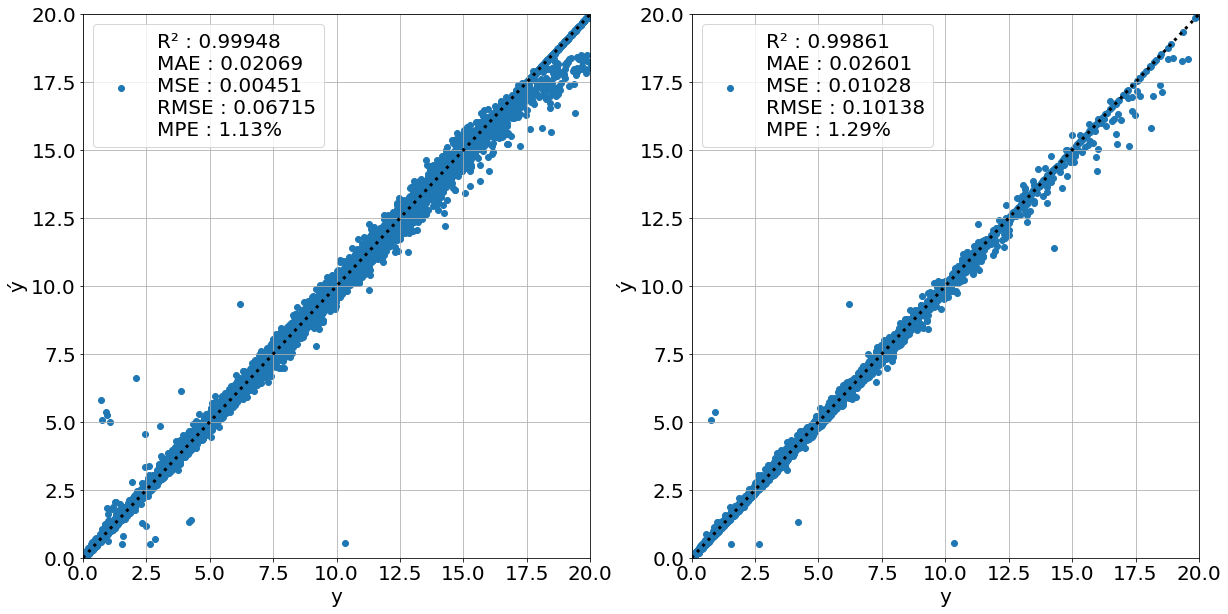

In [55]:
#model_name = ensembled_lgbm_Llt
model_name = ensembled_lgbm_Lmt

processed_data = data_preprocessing("Lmt", 0, 20, new_feature_names = ["N1s","offset","length1"])

parameter = "Lmt"

# split data for ML
data_seen = processed_data.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = processed_data.drop(data_seen.index).reset_index(drop=True)

verify_data(model_name, data_seen, data_unseen, "Lmt",[0,20],[0,20])

regression_timer(model_name, data_seen, data_unseen, "Lmt",[0,20],[0,20])

In [56]:
#[model_Lmr, data_Lmr, data_unseen_Lmr] = regression_data(data_preprocessing("Lmr", -1, 30, new_feature_names = ["N2s","offset","length4"]), "Lmr", "ML_model2_v5_2021_09_03_v1_Lmr")
#verify_data(model_Lmr, data_Lmr, data_unseen_Lmr, "Lmr",[0,30],[0,30])
#del model_Lmr
#del data_Lmr

#processed_data = data_preprocessing("Lmr", -1, 25, new_feature_names = ["N1s","offset","length1"])

processed_data = data_preprocessing("Lmr", -1, 20, new_feature_names = ["N2s","offset","length4"])

parameter = "Lmr"

# split data for ML
data_seen = processed_data.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = processed_data.drop(data_seen.index).reset_index(drop=True)

exp_reg101 = setup(data = data_seen, target = parameter, session_id=123, silent=True, use_gpu=False, remove_perfect_collinearity=False
,numeric_features=["N1","N2","move_tx","move_rx","offset_tx","offset_rx","space1","space3"])

print("start")

a = time.time()

#lgbm_Llt = create_model('lightgbm',learning_rate=0.1, num_iterations=3000, num_leaves=200, max_depth = 14, lambda_l1=0.01)
lgbm_Lmr = create_model('lightgbm',learning_rate=0.1, num_iterations=3000, num_leaves=200, max_depth = 14, lambda_l1=0.5, lamgda_l2=0.5, feature_fraction = 0.8, bagging_fraction=0.8, scale_pos_weight=1.2)
#lgbm_Llt = create_model('lightgbm',learning_rate=0.1, num_iterations=1000, num_leaves=200, max_depth = 14)



ensembled_lgbm_Lmr = ensemble_model(lgbm_Lmr, method = 'Boosting')
print("done : ", time.time()-a)

save_model(ensembled_lgbm_Lmr, "model_Lmr_final")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0657,0.0262,0.1618,0.9968,0.0302,0.0311
1,0.0655,0.0176,0.1325,0.9979,0.0220,0.0318
2,0.0688,0.0286,0.1690,0.9967,0.0263,0.0315
3,0.0649,0.0235,0.1531,0.9971,0.0256,0.0314
4,0.0659,0.0191,0.1382,0.9977,0.0272,0.0322
5,0.0662,0.0187,0.1368,0.9978,0.0221,0.0322
6,0.0675,0.0177,0.1330,0.9979,0.0234,0.0315
7,0.0661,0.0174,0.1318,0.9979,0.0235,0.0326
8,0.0667,0.0173,0.1316,0.9979,0.0247,0.0324
9,0.0681,0.0187,0.1367,0.9977,0.0223,0.0325


done :  3263.993021249771
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['N1', 'N2', 'move_tx',
                                                           'move_rx',
                                                           'offset_tx',
                                                           'offset_rx', 'space1',
                                                           'space3'],
                                       target='Lmr', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fi...
                                                                 min_child_samples=20,
                                                   

avg error :  2.5406492713163806
avg error :  2.7874413071750075
2784550 개 추론 소요시간 :  27.940274000167847 초
1회 추론당 소요시간 :  1.0034035661118617e-05 초
10만회 추론당 소요시간 :  1.0034035661118617 초


array([1.18045325, 0.20735336, 0.18202237, ..., 1.8717402 , 2.84397964,
       0.52107661])

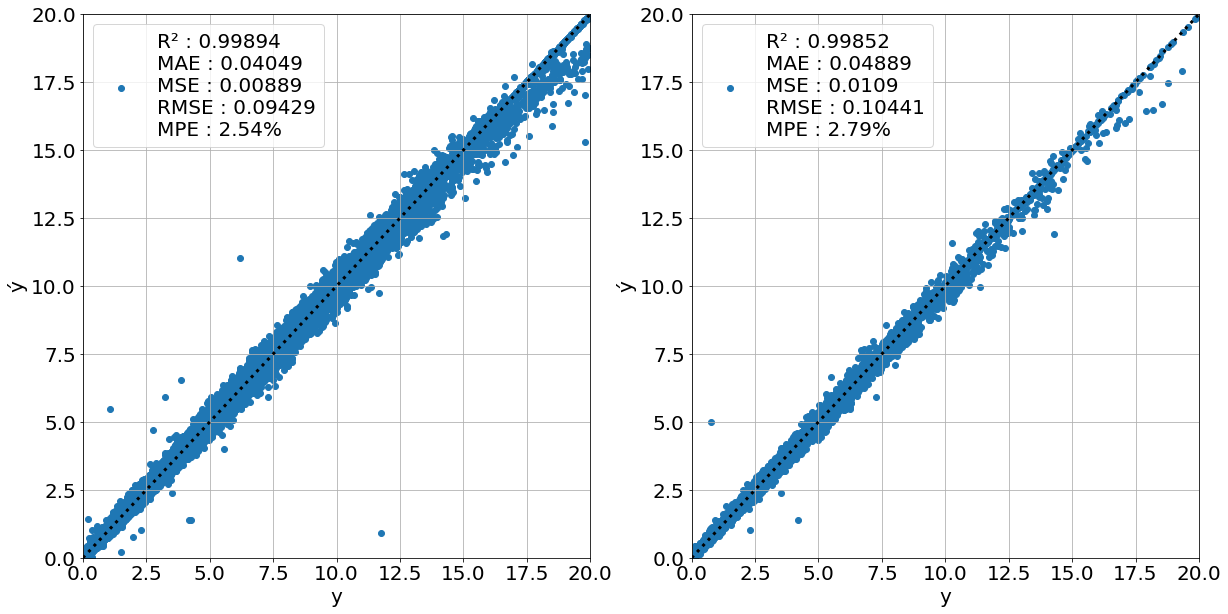

In [58]:
model_name = lgbm_Lmr
#model_name = ensembled_lgbm_Lmr

processed_data = data_preprocessing("Lmr", 0, 20, new_feature_names = ["N2s","offset","length4"])

parameter = "Lmr"

# split data for ML
data_seen = processed_data.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = processed_data.drop(data_seen.index).reset_index(drop=True)

verify_data(model_name, data_seen, data_unseen, "Lmr",[0,20],[0,20])

regression_timer(model_name, data_seen, data_unseen, "Lmr",[0,20],[0,20])

In [47]:
#[model_Llt, data_Llt, data_unseen_Llt] = regression_data(data_preprocessing("Llt", 0, 50, new_feature_names = ["offset","length1","length4","window2","window_ratio","from_l2","hw1","hw2","space12","space34"]), "Llt", "ML_model2_v5_2021_09_03_v1_Llt")

#processed_data = data_preprocessing("Llt", 0, 50, new_feature_names = ["offset","length1","length4","window2","window_ratio","from_l2","hw1","hw2","space12","space34"])

#del model_Llt
#del data_Llt


processed_data = csv2 = data_preprocessing("Llt", 0, 50, new_feature_names = ["offset","length1","length4","window2","window_ratio","from_l2","hw1","hw2","space12","space34"])

parameter = "Llt"

# split data for ML
data_seen = processed_data.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = processed_data.drop(data_seen.index).reset_index(drop=True)

exp_reg101 = setup(data = data_seen, target = parameter, session_id=123, silent=True, use_gpu=False, remove_perfect_collinearity=False
,numeric_features=["N1","N2","move_tx","move_rx","offset_tx","offset_rx","space1","space3"])

print("start")

a = time.time()

#lgbm_Llt = create_model('lightgbm',learning_rate=0.1, num_iterations=3000, num_leaves=200, max_depth = 14, lambda_l1=0.01)
lgbm_Llt = create_model('lightgbm',learning_rate=0.1, num_iterations=3000, num_leaves=200, max_depth = 14, lambda_l1=0.5, lamgda_l2=0.5, feature_fraction = 0.8, bagging_fraction=0.8, scale_pos_weight=1.2)
#lgbm_Llt = create_model('lightgbm',learning_rate=0.1, num_iterations=1000, num_leaves=200, max_depth = 14)



ensembled_lgbm_Llt = ensemble_model(lgbm_Llt, method = 'Boosting')
print("done : ", time.time()-a)

save_model(ensembled_lgbm_Llt, "model_Llt_final")



,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3148,0.2905,0.5390,0.9971,0.0276,0.0230
1,0.3111,0.2854,0.5342,0.9972,0.0294,0.0230
2,0.3102,0.2870,0.5357,0.9971,0.0274,0.0227
3,0.3166,0.3790,0.6156,0.9963,0.0321,0.0234
4,0.3162,0.3000,0.5478,0.9971,0.0275,0.0230
5,0.3189,0.3411,0.5841,0.9966,0.0293,0.0231
6,0.3099,0.3003,0.5480,0.9970,0.0285,0.0227
7,0.3097,0.2937,0.5420,0.9971,0.0278,0.0229
8,0.3066,0.2890,0.5376,0.9971,0.0281,0.0228
9,0.3094,0.2802,0.5293,0.9972,0.0275,0.0226


done :  3766.54687833786
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['N1', 'N2', 'move_tx',
                                                           'move_rx',
                                                           'offset_tx',
                                                           'offset_rx', 'space1',
                                                           'space3'],
                                       target='Llt', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fi...
                                                                 min_child_samples=20,
                                                   

avg error :  0.8795870638928147
avg error :  0.869416885376329
2739640 개 추론 소요시간 :  259.02116990089417 초
1회 추론당 소요시간 :  9.454569574867288e-05 초
10만회 추론당 소요시간 :  9.454569574867287 초


array([26.39437192, 27.15802732, 14.46930239, ...,  3.69722675,
        8.53214342,  5.65471855])

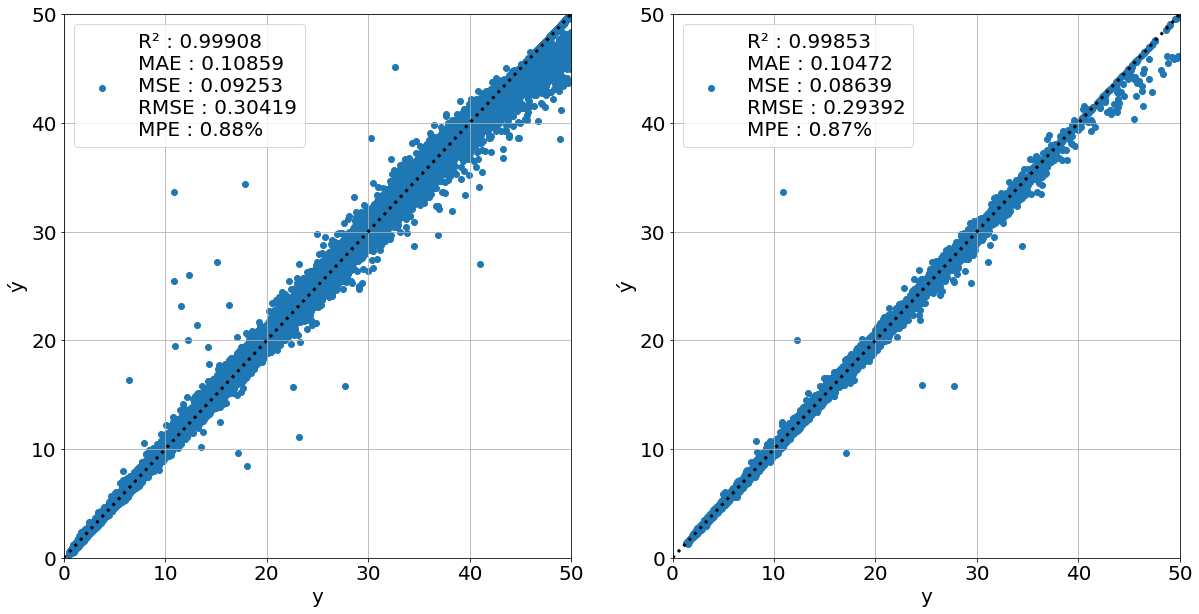

In [53]:
#model_name = ensembled_lgbm_Llt
model_name = ensembled_lgbm_Llt

processed_data = csv2 = data_preprocessing("Llt", 0, 50, new_feature_names = ["offset","length1","length4","window2","window_ratio","from_l2","hw1","hw2","space12","space34"])

parameter = "Llt"

# split data for ML
data_seen = processed_data.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = processed_data.drop(data_seen.index).reset_index(drop=True)

verify_data(model_name, data_seen, data_unseen, "Llt",[0,50],[0,50])

regression_timer(model_name, data_seen, data_unseen, "Llt",[0,50],[0,50])

In [49]:
#[model_Llr, data_Llr, data_unseen_Llr] = regression_data(data_preprocessing("Llr", 0, 25, new_feature_names = ["offset","length1","length4","window2","window_ratio","from_l2","hw1","hw2","space12","space34"]), "Llr", "ML_model2_v5_2021_09_03_v1_Llr")
#verify_data(model_Llr, data_Llr, data_unseen_Llr, "Llr",[0,25],[0,25])
#del model_Llr
#del data_Llr

processed_data = csv2 = data_preprocessing("Llr", 0, 50, new_feature_names = ["offset","length1","length4","window2","window_ratio","from_l2","hw1","hw2","space12","space34"])


parameter = "Llr"

# split data for ML
data_seen = processed_data.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = processed_data.drop(data_seen.index).reset_index(drop=True)

eexp_reg101 = setup(data = data_seen, target = parameter, session_id=123, silent=True, use_gpu=False, remove_perfect_collinearity=False
,numeric_features=["N1","N2","move_tx","move_rx","offset_tx","offset_rx","space1","space3"])

print("start")

a = time.time()

#lgbm_Llt = create_model('lightgbm',learning_rate=0.1, num_iterations=3000, num_leaves=200, max_depth = 14, lambda_l1=0.01)
lgbm_Llr = create_model('lightgbm',learning_rate=0.1, num_iterations=3000, num_leaves=200, max_depth = 14, lambda_l1=0.5, lamgda_l2=0.5, feature_fraction = 0.8, bagging_fraction=0.8, scale_pos_weight=1.2)
#lgbm_Llt = create_model('lightgbm',learning_rate=0.1, num_iterations=1000, num_leaves=200, max_depth = 14)



ensembled_lgbm_Llr = ensemble_model(lgbm_Llr, method = 'Boosting')
print("done : ", time.time()-a)

save_model(ensembled_lgbm_Llr, "model_Llr_final")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2978,0.3170,0.5631,0.9967,0.0296,0.0220
1,0.2882,0.2797,0.5289,0.9971,0.0280,0.0215
2,0.2800,0.2392,0.4891,0.9976,0.0262,0.0211
3,0.2896,0.3117,0.5583,0.9968,0.0278,0.0216
4,0.2886,0.2915,0.5399,0.9970,0.0261,0.0213
5,0.2879,0.2946,0.5428,0.9969,0.0292,0.0217
6,0.2934,0.2996,0.5474,0.9970,0.0279,0.0219
7,0.2925,0.2890,0.5376,0.9970,0.0270,0.0218
8,0.2872,0.2816,0.5307,0.9971,0.0271,0.0215
9,0.2952,0.3022,0.5497,0.9969,0.0270,0.0217


done :  2911.3782138824463
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['N1', 'N2', 'move_tx',
                                                           'move_rx',
                                                           'offset_tx',
                                                           'offset_rx', 'space1',
                                                           'space3'],
                                       target='Llr', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fi...
                                                                 min_child_samples=20,
                                                   

avg error :  0.8331225178876177
avg error :  0.7945054775303382
2749560 개 추론 소요시간 :  247.02447533607483 초
1회 추론당 소요시간 :  8.98414565734426e-05 초
10만회 추론당 소요시간 :  8.984145657344259 초


array([12.83578564,  9.64205691, 16.48533109, ...,  3.69568789,
        8.53302784,  5.66350244])

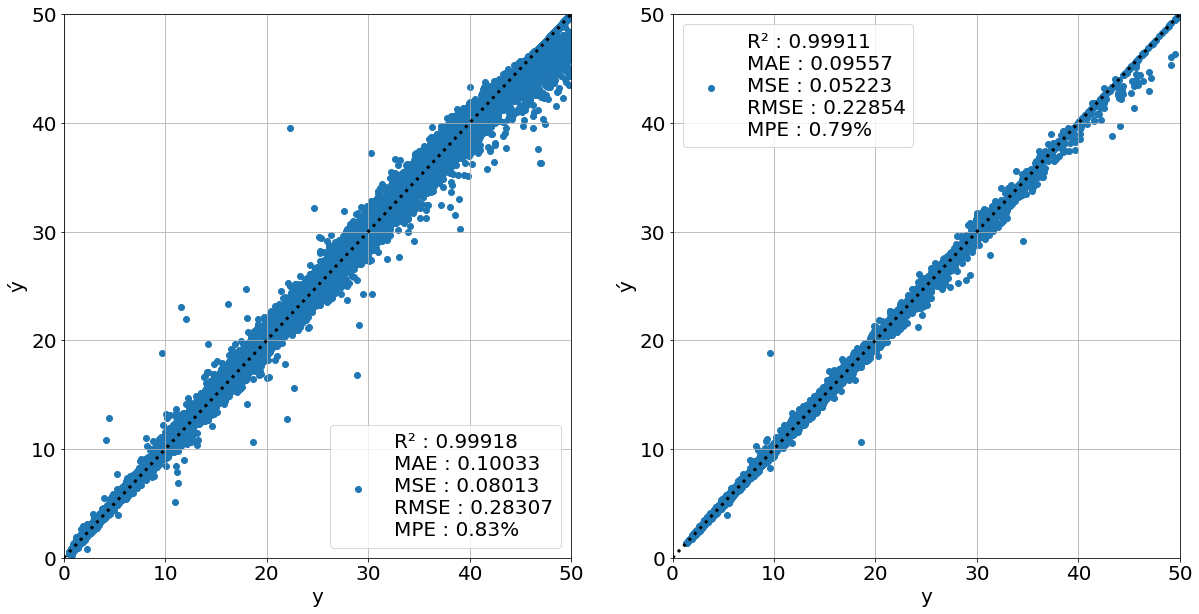

In [51]:
model_name = ensembled_lgbm_Llr

processed_data = csv2 = data_preprocessing("Llr", 0, 50, new_feature_names = ["offset","length1","length4","window2","window_ratio","from_l2","hw1","hw2","space12","space34"])


parameter = "Llr"

# split data for ML
data_seen = processed_data.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = processed_data.drop(data_seen.index).reset_index(drop=True)

verify_data(model_name, data_seen, data_unseen, "Llr",[0,50],[0,50])

regression_timer(model_name, data_seen, data_unseen, "Llr",[0,50],[0,50])

In [14]:
#[model_R1, data_R1, data_unseen_R1] = regression_data(data_preprocessing("R1", -1, 0.03, new_feature_names = ["N1s","offset","length1"]), "R1", "ML_model2_v5_2021_09_03_v1_R1")
#verify_data(model_R1, data_R1, data_unseen_R1, "R1",[0,0.030],[0,0.030])
#del model_R1
#del data_R1

processed_data = data_preprocessing("R1", -1, 0.05, new_feature_names = ["N1s","offset","length1"])

parameter = "R1"

# split data for ML
data_seen = processed_data.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = processed_data.drop(data_seen.index).reset_index(drop=True)

exp_reg101 = setup(data = data_seen, target = parameter, session_id=123, silent=True, use_gpu=False, remove_perfect_collinearity=False
,numeric_features=["N1","N2","move_tx","move_rx","offset_tx","offset_rx","space1","space3"])

print("start")

a = time.time()

#lgbm_Llt = create_model('lightgbm',learning_rate=0.1, num_iterations=3000, num_leaves=200, max_depth = 14, lambda_l1=0.01)
#lgbm_R1 = create_model('lightgbm',learning_rate=0.1, num_iterations=30000, num_leaves=200, max_depth = 14, lambda_l1=0.5, lamgda_l2=0.5, feature_fraction = 0.8, bagging_fraction=0.8, scale_pos_weight=1.2)
#lgbm_Llt = create_model('lightgbm',learning_rate=0.1, num_iterations=1000, num_leaves=200, max_depth = 14)

lgbm_R1 = create_model('lightgbm',learning_rate=0.1, num_iterations=3000, num_leaves=200, max_depth = 14, feature_fraction = 0.8, bagging_fraction=0.8, scale_pos_weight=1.2)


ensembled_lgbm_R1 = ensemble_model(lgbm_R1, method = 'Boosting')
print("done : ", time.time()-a)

save_model(ensembled_lgbm_R1, "model_R1_final")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0011,0.0000,0.0017,0.9723,0.0017,0.0624
1,0.0012,0.0000,0.0018,0.9702,0.0017,0.0639
2,0.0011,0.0000,0.0017,0.9729,0.0016,0.0621
3,0.0011,0.0000,0.0017,0.9732,0.0016,0.0623
4,0.0011,0.0000,0.0017,0.9715,0.0017,0.0626
5,0.0011,0.0000,0.0017,0.9728,0.0016,0.0625
6,0.0012,0.0000,0.0017,0.9718,0.0017,0.0627
7,0.0012,0.0000,0.0018,0.9694,0.0018,0.0649
8,0.0012,0.0000,0.0018,0.9711,0.0017,0.0623
9,0.0011,0.0000,0.0017,0.9723,0.0017,0.0628


done :  1348.5001978874207
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['N1', 'N2', 'move_tx',
                                                           'move_rx',
                                                           'offset_tx',
                                                           'offset_rx', 'space1',
                                                           'space3'],
                                       target='R1', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fil...
                                                                 min_child_samples=20,
                                                   

avg error :  2.1129270984302915
avg error :  2.497743529228786
944250 개 추론 소요시간 :  107.91023421287537 초
1회 추론당 소요시간 :  0.00011428142357731042 초
10만회 추론당 소요시간 :  11.428142357731042 초


array([0.01854747, 0.02354101, 0.01520934, ..., 0.00839841, 0.02028051,
       0.01036082])

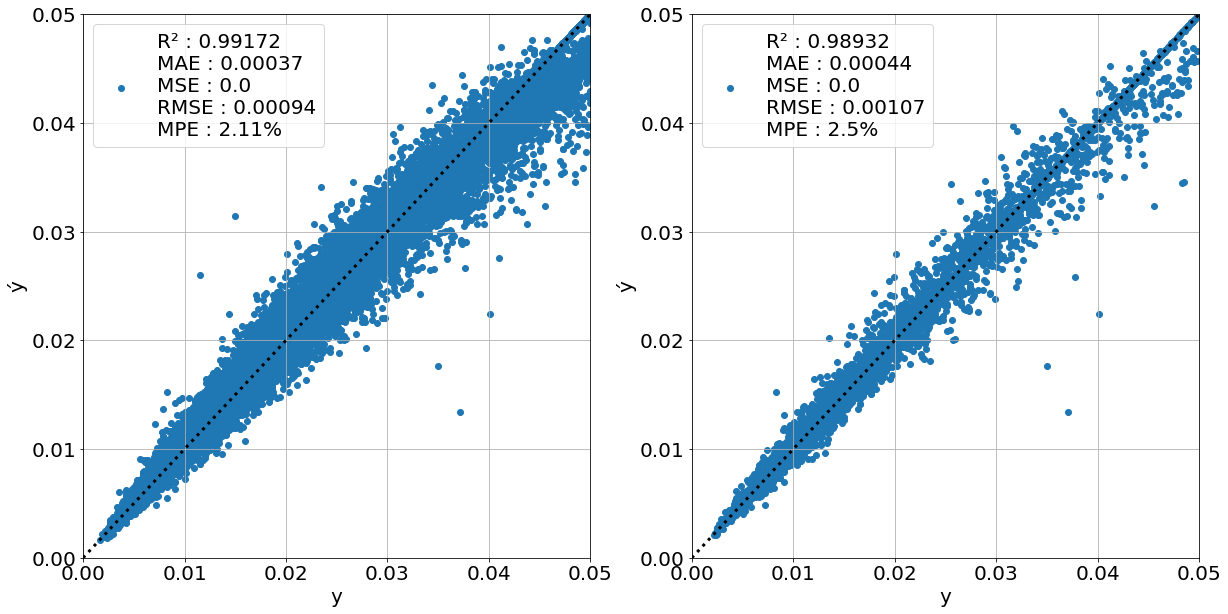

In [16]:
model_name = ensembled_lgbm_R1
#model_name = lgbm_R1

processed_data = data_preprocessing("R1", 0, 0.05, new_feature_names = ["N1s","offset","length1"])


parameter = "R1"

# split data for ML
data_seen = processed_data.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = processed_data.drop(data_seen.index).reset_index(drop=True)

verify_data(model_name, data_seen, data_unseen, "R1",[0,0.05],[0,0.05])

regression_timer(model_name, data_seen, data_unseen, "R1",[0,0.05],[0,0.05])

In [9]:
#[model_R2, data_R2, data_unseen_R2] = regression_data(data_preprocessing("R2", -1, 0.030, new_feature_names = ["N2s","offset","length4"]), "R2", "ML_model2_v5_2021_09_03_v1_R2")
#verify_data(model_R2, data_R2, data_unseen_R2, "R2",[0,0.030],[0,0.030])
#del model_R2
#del data_R2

processed_data = data_preprocessing("R2", -1, 0.05, new_feature_names = ["N2s","offset","length4"])

parameter = "R2"

# split data for ML
data_seen = processed_data.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = processed_data.drop(data_seen.index).reset_index(drop=True)

exp_reg101 = setup(data = data_seen, target = parameter, session_id=123, silent=True, use_gpu=False, remove_perfect_collinearity=False
,numeric_features=["N1","N2","move_tx","move_rx","offset_tx","offset_rx","space1","space3"])

print("start")

a = time.time()

#lgbm_Llt = create_model('lightgbm',learning_rate=0.1, num_iterations=3000, num_leaves=200, max_depth = 14, lambda_l1=0.01)
#lgbm_R1 = create_model('lightgbm',learning_rate=0.1, num_iterations=30000, num_leaves=200, max_depth = 14, lambda_l1=0.5, lamgda_l2=0.5, feature_fraction = 0.8, bagging_fraction=0.8, scale_pos_weight=1.2)
#lgbm_Llt = create_model('lightgbm',learning_rate=0.1, num_iterations=1000, num_leaves=200, max_depth = 14)

lgbm_R2 = create_model('lightgbm',learning_rate=0.1, num_iterations=3000, num_leaves=200, max_depth = 14, feature_fraction = 0.8, bagging_fraction=0.8, scale_pos_weight=1.2)


ensembled_lgbm_R2 = ensemble_model(lgbm_R2, method = 'Boosting')
print("done : ", time.time()-a)

save_model(ensembled_lgbm_R2, "model_R2_final")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0011,0.0000,0.0017,0.9741,0.0016,0.0557
1,0.0011,0.0000,0.0017,0.9742,0.0016,0.0558
2,0.0012,0.0000,0.0017,0.9732,0.0017,0.0564
3,0.0011,0.0000,0.0017,0.9741,0.0016,0.0559
4,0.0011,0.0000,0.0017,0.9741,0.0016,0.0559
5,0.0011,0.0000,0.0017,0.9753,0.0016,0.0546
6,0.0011,0.0000,0.0016,0.9743,0.0016,0.0552
7,0.0011,0.0000,0.0017,0.9751,0.0016,0.0566
8,0.0011,0.0000,0.0016,0.9760,0.0016,0.0552
9,0.0012,0.0000,0.0017,0.9733,0.0017,0.0577


done :  1312.7673110961914
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['N1', 'N2', 'move_tx',
                                                           'move_rx',
                                                           'offset_tx',
                                                           'offset_rx', 'space1',
                                                           'space3'],
                                       target='R2', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fil...
                                                                 min_child_samples=20,
                                                   

avg error :  1.8652228222990226
avg error :  2.3600030518751325
942050 개 추론 소요시간 :  119.91893100738525 초
1회 추론당 소요시간 :  0.0001272957178572106 초
10만회 추론당 소요시간 :  12.729571785721062 초


array([0.03578564, 0.01962056, 0.02566202, ..., 0.00735369, 0.0165015 ,
       0.00950497])

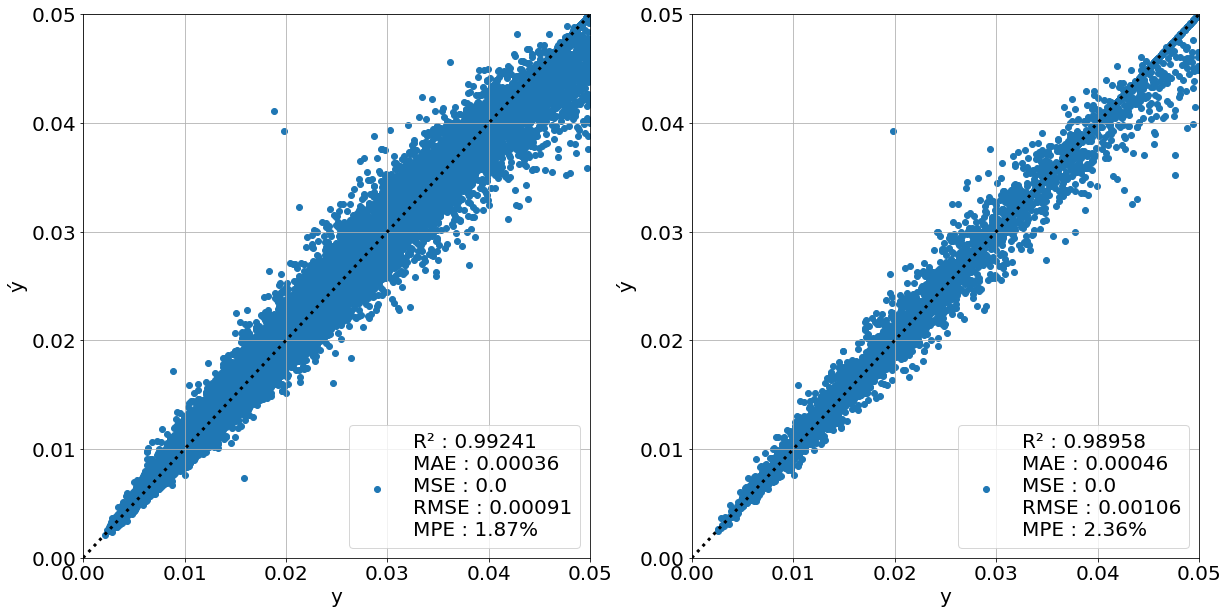

In [13]:
model_name = ensembled_lgbm_R2
#model_name = lgbm_R1

processed_data = data_preprocessing("R2", 0, 0.05, new_feature_names = ["N2s","offset","length4"])


parameter = "R2"

# split data for ML
data_seen = processed_data.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = processed_data.drop(data_seen.index).reset_index(drop=True)

verify_data(model_name, data_seen, data_unseen, "R2",[0,0.05],[0,0.05])

regression_timer(model_name, data_seen, data_unseen, "R2",[0,0.05],[0,0.05])

In [245]:
csv2 = csv
#csv2 = csv2.iloc[:11000,:]


#for x in range(10000) :
#    csv2['Llt'][x] = csv2['Llt'][x]*random.randint(90,110)/100

csv2 = csv2[csv2['Lmt']>0.1].reset_index(drop=True)
csv2 = csv2[csv2['Lmr']>0.1].reset_index(drop=True)
#csv2['k'] = -csv2['k']
#csv2 = csv2[csv2['k']>0].reset_index(drop=True)

csv2 = csv2.drop('Lmt',axis=1)
csv2 = csv2.drop('Lmr',axis=1)
csv2 = csv2.drop('Llt',axis=1)
csv2 = csv2.drop('Llr',axis=1)


csv2 = csv2.drop("I1",axis=1)
csv2 = csv2.drop("I2",axis=1)
csv2 = csv2.drop("Zt",axis=1)
csv2 = csv2.drop("Zr",axis=1)
csv2 = csv2.drop("Zm",axis=1)

csv2 = csv2.drop("k",axis=1)
csv2 = csv2.drop("Lt",axis=1)
csv2 = csv2.drop("Lr",axis=1)
csv2 = csv2.drop("Lm",axis=1)
csv2 = csv2.drop("Rt",axis=1)
csv2 = csv2.drop("Rr",axis=1)

csv2 = csv2.drop("copperloss_tx",axis=1)
csv2 = csv2.drop("copperloss_rx",axis=1)
#csv2 = csv2.drop("R1",axis=1)
csv2 = csv2.drop("R2",axis=1)

dataset = csv2

parameter = "Lmt"


data_seen = dataset.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data_seen.index).reset_index(drop=True)


# regresion setting
#exp_reg101 = setup(data = data_seen, target = "Lmt", session_id=123)
exp_reg101 = setup(data = data_seen, target = parameter, session_id=123, silent=True, use_gpu=False, remove_perfect_collinearity=False
,numeric_features=["N1","N2","move_tx","move_rx","offset_tx","offset_rx","space1","space3"]) 

#lgbm = create_model('lightgbm',num_leaves=180, max_depth=15)
lgbm = create_model('lightgbm')
et =  create_model('et')
rf = create_model('rf')
gbr = create_model('gbr')
lr = create_model('lr')
dt = create_model('dt')
ridge = create_model('ridge')

#blgbm = ensemble_model(lgbm, method = 'Bagging')
#bet = ensemble_model(et, method = 'Bagging')

#top3 = compare_models(n_select = 2) 
#blender = blend_models(estimator_list = top3)
#blender = blend_models(estimator_list = [blgbm,et])
# create model
#lgbm = create_model('lightgbm',num_leaves=60, max_depth=20)
#lgbm = create_model('lightgbm',num_leaves=180, max_depth=15)
#lgbm = create_model('lightgbm',num_leaves=180, max_depth=15)


#verify_data(lgbm,data_seen,data_unseen,parameter,xlim=[0, 25],ylim=[0, 25]) 

a=1

ValueError: Target parameter: Lmt does not exist in the data provided.

avg error :  3.3323462979690994
avg error :  3.994810367012046


array([0.02188956, 0.02095245, 0.01647021, ..., 0.00839841, 0.02028051,
       0.01036082])

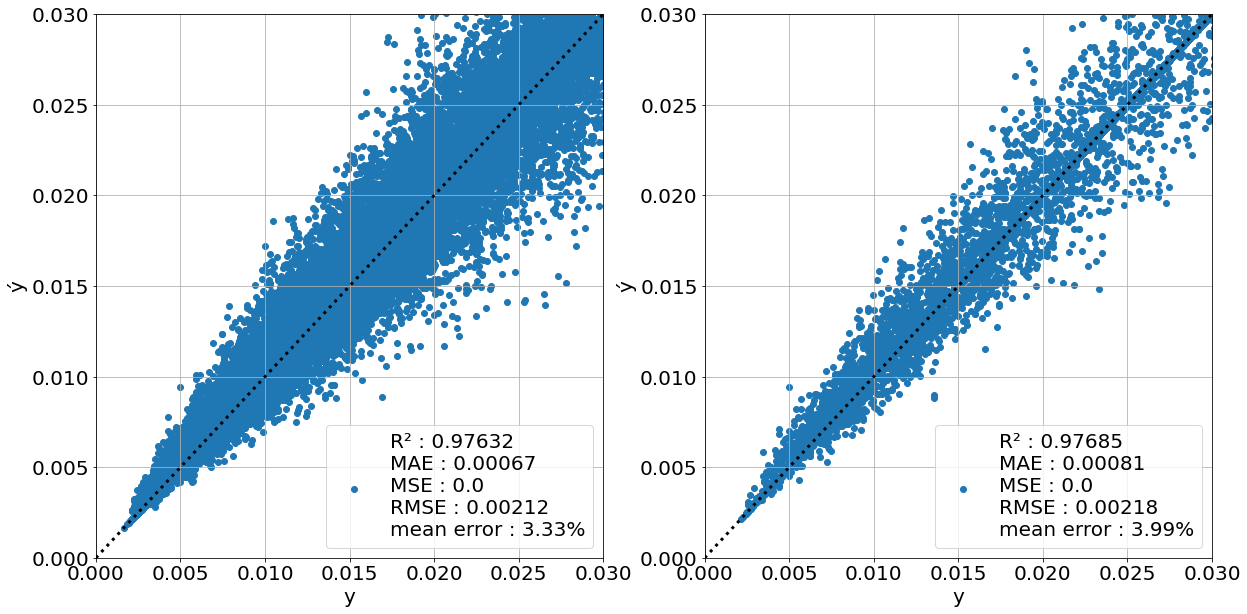

In [244]:
#lgbm = create_model('lightgbm',num_leaves=180, max_depth=15)

#verify_data(blender,data_seen,data_unseen,parameter,xlim=[0, 25],ylim=[0, 25]) 
#verify_data(blender,data_seen,data_unseen,parameter,xlim=[0, 0.03],ylim=[0, 0.03]) 
verify_data(et,data_seen,data_unseen,parameter,xlim=[0, 0.03],ylim=[0, 0.03]) 

In [ ]:
import pandas as pd
from pycaret.regression import load_model

ML_model = load_model("model_Lmt")

parm = pd.DataFrame([[8,8,6,6,30000,2,2,0,0,3500,5,20,5,20,20,60,150,200]], columns=['N1', 'N2', 'd1', 'd2', 'freq', 'move_tx', 'move_rx', 'offset_tx', 'offset_rx', 'per','space1','space2','space3','space4','l1','l2','h1','w1'])

sol = ML_model.predict(parm)

sol[0]



In [ ]:
csv2

,N1,N2,d1,d2,freq,move_tx,move_rx,offset_tx,offset_rx,per,space1,space2,space3,space4,l1,l2,h1,w1,Lmt
0,8,8,6.0,9.7,49000.0,2,5,7,-9,1480,1,23,3,55,19,41,166,24,0.240726
1,8,8,11.7,10.7,49000.0,6,4,18,-5,1160,5,47,3,31,31,72,251,248,2.028551
2,8,8,9.0,5.4,49000.0,4,1,9,-18,4192,5,31,7,28,33,40,191,212,8.913746
3,8,8,9.5,4.2,49000.0,6,3,14,-7,3419,1,21,6,38,15,30,185,221,4.010594
4,11,11,7.5,10.3,58000.0,1,2,13,-17,4445,7,50,6,46,16,69,207,241,8.989630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98340,9,9,8.4,9.2,42000.0,7,2,8,-14,2483,9,59,9,35,30,71,235,105,2.362190
98341,5,5,11.4,8.9,25000.0,3,4,12,-6,1838,2,50,3,47,23,62,161,118,0.637322
98342,5,5,8.6,9.6,25000.0,2,2,17,-2,4913,1,21,3,35,29,51,110,80,1.872520
98343,5,5,11.0,3.6,25000.0,1,7,18,-12,4437,1,33,4,31,26,59,131,170,2.843685
